In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2-lGYZzFg_1NYpm3Hc1FxjM8D0lxLUMvSScYXuek-ouj',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'agesturebasedtoolforsterilebrowsi-donotdelete-pr-bnlnbcqb2k7omr'
object_key = 'dataset.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [2]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [3]:
ls

dataset/


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(r'dataset/train',
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='grayscale',
                                            class_mode='categorical')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(r'dataset/test',
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='grayscale',
                                          class_mode='categorical') 

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [7]:
# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the layers i.e. input layer
model.add(Flatten())

# Adding a fully connected layer, i.e. Hidden Layer
model.add(Dense(units=512 , activation='relu'))

# softmax for categorical analysis, Output Layer
model.add(Dense(units=6, activation='softmax')) 

In [8]:
model.summary()#summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [9]:
# Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [10]:
# Model Train
H = model.fit(x_train,
                    steps_per_epoch = 198 , 
                    epochs = 25, 
                    validation_data = x_test,
                    validation_steps = 10 )

Epoch 1/25
198/198 [==============================] - 13s 62ms/step - loss: 1.2344 - accuracy: 0.4916 - val_loss: 0.6905 - val_accuracy: 0.6667
Epoch 2/25
198/198 [==============================] - 12s 61ms/step - loss: 0.6303 - accuracy: 0.7407 - val_loss: 0.3729 - val_accuracy: 0.9333
Epoch 3/25
198/198 [==============================] - 12s 62ms/step - loss: 0.4234 - accuracy: 0.8300 - val_loss: 0.4331 - val_accuracy: 0.8333
Epoch 4/25
198/198 [==============================] - 12s 62ms/step - loss: 0.3119 - accuracy: 0.8788 - val_loss: 0.2575 - val_accuracy: 0.9667
Epoch 5/25
198/198 [==============================] - 12s 62ms/step - loss: 0.2350 - accuracy: 0.9276 - val_loss: 0.2708 - val_accuracy: 0.8333
Epoch 6/25
198/198 [==============================] - 12s 62ms/step - loss: 0.1992 - accuracy: 0.9226 - val_loss: 0.2085 - val_accuracy: 0.9667
Epoch 7/25
198/198 [==============================] - 12s 61ms/step - loss: 0.1746 - accuracy: 0.9394 - val_loss: 0.2239 - val_accuracy:

In [52]:
# Save the model
model.save('Handgesture.h5')

In [53]:
ls

accuracy.png  Handgesture1.tar.gb  Hand_Gesture.h5  img2.png  model-bw.json
dataset/      Handgesture.h5       Handgesture.tgz  loss.png


In [54]:
!tar -zcvf Handgesture.tgz Handgesture.h5

Handgesture.h5


In [55]:
ls -1

accuracy.png
dataset/
Handgesture1.tar.gb
Handgesture.h5
Hand_Gesture.h5
Handgesture.tgz
img2.png
loss.png
model-bw.json


In [56]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

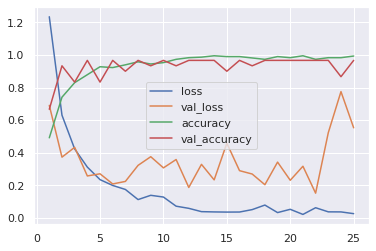

In [57]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 25+1), H.history['loss'], label='loss')
plt.plot(np.arange(1, 25+1), H.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('loss.png')

plt.plot(np.arange(1, 25+1), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(1, 25+1), H.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.savefig('accuracy.png')

# Testing

In [58]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model_test = load_model("Handgesture.h5") 

#loading the model for testing
path = "img2.png"

In [59]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p_3spYCnbB94Xt90mkLls_Bo5uV7alCYXLHrvppgG24y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'gesturebasedtoolforsterilebrowsin-donotdelete-pr-hkfvqgjdhu3gq1'
object_key = 'img2.zip'

streaming_body_5 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [60]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_5.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

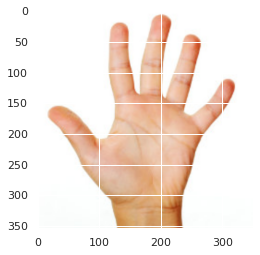

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [62]:
ls

accuracy.png  Handgesture1.tar.gb  Hand_Gesture.h5  img2.png  model-bw.json
dataset/      Handgesture.h5       Handgesture.tgz  loss.png


In [63]:
#loading of the image
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)

#image to array
x.shape

(64, 64, 1)

In [64]:
x = np.expand_dims(x,axis = 0)

x.shape

(1, 64, 64, 1)

In [65]:
pred = np.argmax(model.predict(x), axis=-1)

#predicting the classes

index=['0','1','2','3','4','5']


In [66]:
pred

array([5])

In [67]:

result=str(index[pred[0]])

result

'5'

In [68]:
p = []

for i in range(0,6):
    for j in range(0,5):
        path = "dataset/test/"+str(i)+"/"+str(j)+".jpg"
        img = image.load_img(path,color_mode = "grayscale",target_size= (64,64))
        x = image.img_to_array(img)
        x = np.expand_dims(x,axis = 0)
        pred = np.argmax(model.predict(x), axis=-1)
        p.append(pred)

print(p)

[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([3]), array([3]), array([3]), array([3]), array([3]), array([4]), array([4]), array([4]), array([4]), array([4]), array([5]), array([5]), array([5]), array([5]), array([5])]


In [69]:
result = []
index=['0','1','2','3','4','5']
for i in p:
    result.append(index[i[0]])
    
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5']


In [70]:
res=[]
res1=[]
for i in result:
    res.append(int(i))
for i in p:
    res1.append(int(i))
    
print(res,res1)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5] [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]


<AxesSubplot:>

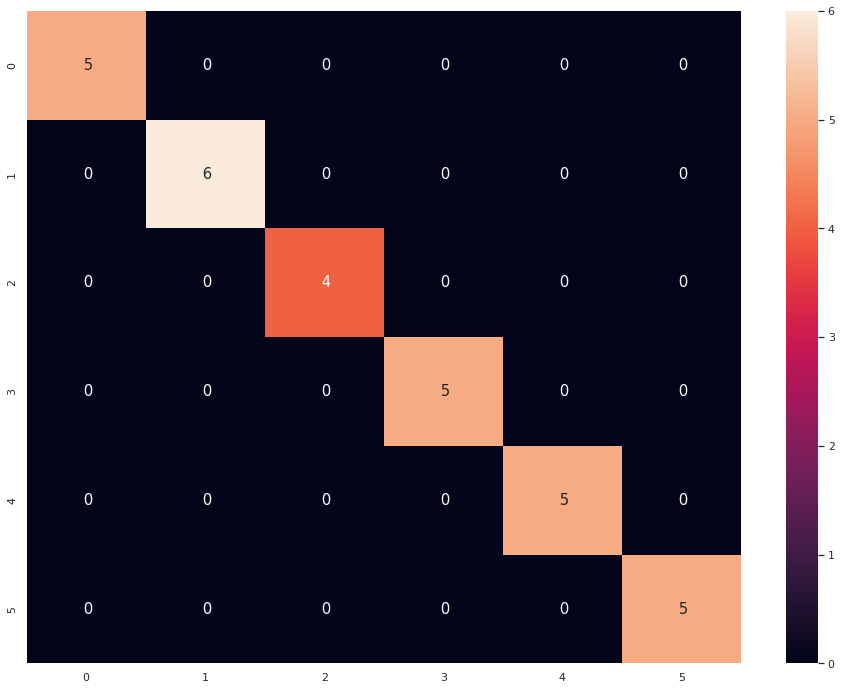

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
df_cmatrix = pd.DataFrame(confusion_matrix(p, res),index=index, columns=index)
sns.set(font_scale=1.0)
fig,ax = plt.subplots(figsize=(16,12))
sns.heatmap(df_cmatrix, annot=True,annot_kws={"size": 15},fmt='2g')

## IBM Deployment

In [36]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 16.5 MB/s eta 0:00:01


In [37]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"<api>"
}

client=APIClient(wml_credentials)

In [38]:
client=APIClient(wml_credentials)

In [39]:
client

In [40]:
def guid_space_name(client,Gesture):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==Gesture)['metadata']['id'])

In [41]:
space_uid=guid_space_name(client,'Gesture Based Tool for Sterile Browsing of Radiology Images')
print("Space UID "+space_uid)

Space UID c6cb5ca4-eff9-4c2e-8d79-f3ae6b9d2411


In [42]:
client.set.default_space(space_uid)

'SUCCESS'

In [43]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [44]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [45]:
import keras as ks
ks.__version__

'2.7.0'

In [46]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [47]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [48]:
model_details = client.repository.store_model(model = 'Handgesture.tgz' , meta_props = {
    client.repository.ModelMetaNames.NAME : "Handgesture", 
    client.repository.ModelMetaNames.TYPE : "tensorflow_rt22.1",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid
})
model_id = client.repository.get_model_id(model_details)

In [49]:
model_id=client.repository.get_model_id(model_details)

In [50]:
model_id

'1ba3e07a-515f-4934-9dbc-a2b780c1bae2'

In [51]:
client.repository.download(model_id,'Handgesture1.tar.gb')

Successfully saved model content to file: 'Handgesture1.tar.gb'


'/home/wsuser/work/Handgesture1.tar.gb'

###  Team Members

          Nalinkumar S
          Ranjith S
          Amuthayazhini K
          Mithrha R

